In [1]:
import qiskit as qc
%matplotlib inline
circuit = qc.QuantumCircuit(2, 2)

# NOT gate on first qbit
circuit.x(0) 

# Controlled not on second qbit
circuit.cx(0, 1)

# Conversion of qbits to classical bits
circuit.measure([0, 1],[0, 1])

In [2]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

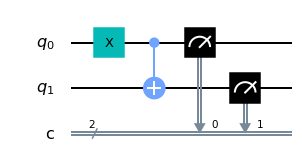

In [4]:
circuit.draw(output="mpl")

In [6]:
from qiskit import IBMQ
IBMQ.save_account(open("untitled.txt", "r").read())

In [9]:
IBMQ.load_account()

/home/avnish/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider("ibm-q")

# Prints existing providers with number of qubits present
for backend in provider.backends():
    try:
        qbit_count = len(backend.properties().qubits)
    except:
        qbit_count = "simulated"
    
    print("{} has {} jobs queued and {} qubits".format(backend.name(), backend.status().pending_jobs, qbit_count))

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 2 queued and 5 qubits
ibmq_16_melbourne has 17 queued and 15 qubits
ibmq_vigo has 75 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_valencia has 94 queued and 5 qubits
ibmq_london has 0 queued and 5 qubits
ibmq_burlington has 35 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_santiago has 27 queued and 5 qubits


In [14]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_london")
job = qc.execute(circuit, backend=backend, shots=1000)
job_monitor(job)

Job Status: job has successfully run


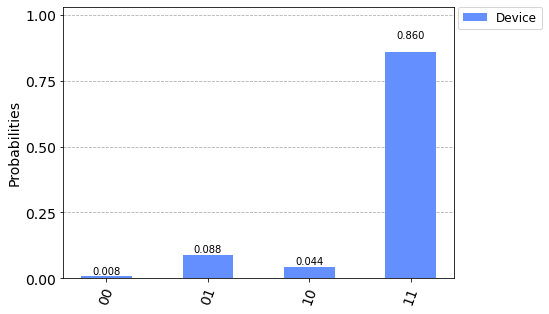

In [15]:
from qiskit.visualization import plot_histogram
from matplotlib import style

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [21]:
c = qc.QuantumCircuit(2, 2)

# Hadamard Gate puts q0 in superposition
c.h(0)

c.cx(0, 1)

c.measure([0, 1], [0, 1])

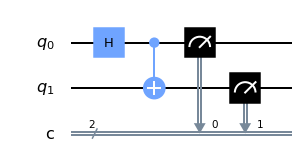

In [22]:
c.draw(output="mpl")

In [23]:
backend = provider.get_backend("ibmq_london")
job = qc.execute(c, backend=backend, shots=1000)
job_monitor(job)

Job Status: job has successfully run


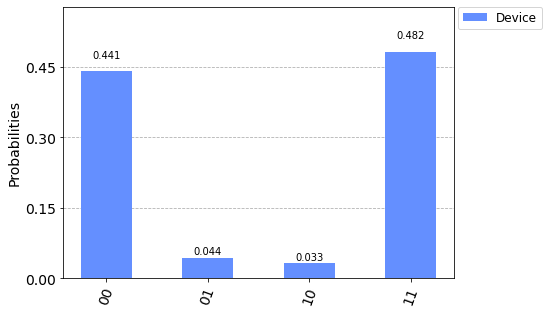

In [24]:
result = job.result()
counts = result.get_counts(c)

plot_histogram([counts], legend=['Device'])

# Simulator

In [25]:
from qiskit import Aer
sim_backend = Aer.get_backend('qasm_simulator')

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


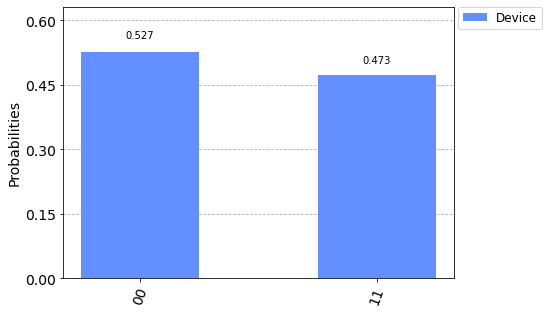

In [26]:
backend = provider.get_backend("ibmq_london")
job = qc.execute(c, backend=sim_backend, shots=1000)
job_monitor(job)

result = job.result()
counts = result.get_counts(c)

plot_histogram([counts], legend=['Device'])